# Poke-Project

Pokemon EDA and visualisations.

In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\shani\\PycharmProjects\\poke-project\\Pokemon.csv")
df.head()

,poke_id,Name,poke_type_1,poke_type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
shape = df.shape
print(f"Number of Rows: {shape[0]}\nNumber of columns: {shape[1]}")

Number of Rows: 800
Number of columns: 13


In [5]:
df.describe()

,poke_id,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


From the df.describe we can see that there seems to be no missing numerical data in the table. Between all of the attributes of the pokemon (attack defense etc) we can see that they have similar distributions. Though for comparisons to be made between them we may need to make some normalisations. THe highest mean is attack, but this also has the second highest std meaning that is one of the more varied attributes, closely following special attack.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   poke_id      800 non-null    int64 
 1   Name         800 non-null    object
 2   poke_type_1  800 non-null    object
 3   poke_type_2  414 non-null    object
 4   Total        800 non-null    int64 
 5   HP           800 non-null    int64 
 6   Attack       800 non-null    int64 
 7   Defense      800 non-null    int64 
 8   Sp_Atk       800 non-null    int64 
 9   Sp_Def       800 non-null    int64 
 10  Speed        800 non-null    int64 
 11  Generation   800 non-null    int64 
 12  Legendary    800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


All datatypes are as expected, no updates required.

Ideas for things to explore:
- Most common primary and secondary types of pokemon
- Which pokemon has the best attack defence etc for each stat
- Highest stat per type
- Is there any correlation between pokemon type and stats?
- Is there any relationship between legendary status and stats?

If we use the pokemon primary type as a target, can we predict this from all other information available? What kind of model would be best suited to this kind of question?

Would it also be possible with the given data to predict the winner of contests between two pokemon?

In [7]:
# What are the unique primary pokemon types?
df["poke_type_1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

Text(0.5, 0, 'Primary Poke Types')

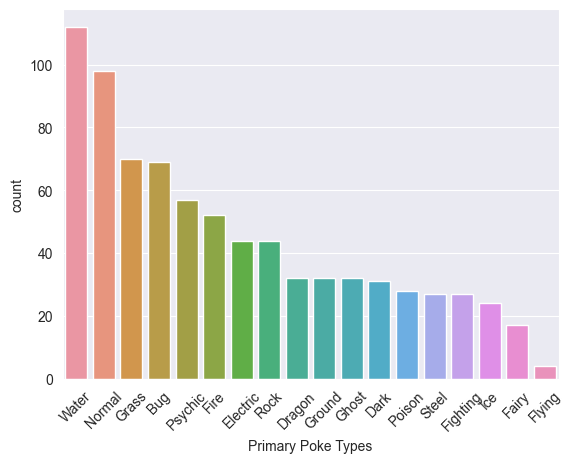

In [8]:
#Count how many times each primary type occurs
type_count = df.poke_type_1.value_counts()
type(type_count)
# Using the value counts produces a pandas Series. We need to convert this into a dataframe to be able to visualise.

cols = ["primary_type", "count"]

types_df = pd.DataFrame(type_count, columns=cols)
types_df.reset_index()
types_df.drop(["primary_type"], axis=1, inplace=True)
types_df.reset_index(inplace=True)


# Now that we have a dataframe we should be able to plot the data
sns.barplot(types_df, x="poke_type_1", y="count", width=0.8)
plt.xticks(rotation=45)
plt.xlabel('Primary Poke Types')

Now we can see that the water type pokemon are athe most common in the pokedex.

Lets also assess the demographic of secondary poke types.

Text(0.5, 0, 'Secondary Poke Types')

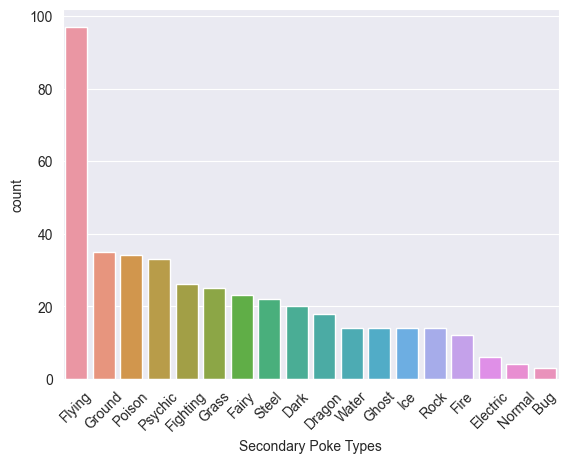

In [9]:
#Count how many times each primary type occurs
sec_type_count = df.poke_type_2.value_counts()
type(type_count)

# Using the value counts produces a pandas Series. We need to convert this into a dataframe to be able to visualise.

cols = ["count"]

sec_types_df = pd.DataFrame(sec_type_count, columns=cols)
sec_types_df.reset_index(inplace=True)

# Now that we have a dataframe we should be able to plot the data
sns.barplot(sec_types_df, x="poke_type_2", y="count", width=0.8)
plt.xticks(rotation=45)
plt.xlabel('Secondary Poke Types')

By far flying type is the most common secondary pokemon type.

## Sorting by columns

In [10]:
df.sort_values("HP", ascending=False)

,poke_id,Name,poke_type_1,poke_type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
351,321,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False
655,594,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
381,349,Feebas,Water,NaN,200,20,15,20,10,55,80,3,False
388,355,Duskull,Ghost,NaN,295,20,40,90,30,90,25,3,False
55,50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False


In [11]:
df.sort_values("Attack", ascending=False)

,poke_id,Name,poke_type_1,poke_type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False


In [12]:
df.sort_values("Defense", ascending=False)

,poke_id,Name,poke_type_1,poke_type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
414,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,63,Abra,Psychic,NaN,310,25,20,15,105,55,90,1,False
186,172,Pichu,Electric,NaN,205,20,40,15,35,35,60,2,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
488,440,Happiny,Normal,NaN,220,100,5,5,15,65,30,4,False


In [13]:

df.sort_values("Sp_Atk", ascending=False)

,poke_id,Name,poke_type_1,poke_type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,554,Darumaka,Fire,NaN,315,70,90,45,15,45,50,5,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
486,438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False


In [14]:
# Special Defence
df.sort_values("Sp_Def", ascending=False)


,poke_id,Name,poke_type_1,poke_type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
415,378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True
430,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,174,Igglybuff,Normal,Fairy,210,90,30,15,40,20,15,2,False
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
16,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False


In [15]:
df.sort_values("Speed", ascending=False)

,poke_id,Name,poke_type_1,poke_type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
315,291,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
428,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
154,142,AerodactylMega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,597,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False
486,438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False
359,328,Trapinch,Ground,NaN,290,45,100,45,45,45,10,3,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


We can also find the min and max values using the loc and idxmin and idxmax functions.

In [25]:
columns = ["HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed"]

for col in columns:
    print(f"Max {col}:\n {df.loc[df[col].idxmax()]}")
    print(f"Min {col}:\n {df.loc[df[col].idxmin()]}")


Max HP:
 poke_id            242
Name           Blissey
poke_type_1     Normal
poke_type_2        NaN
Total              540
HP                 255
Attack              10
Defense             10
Sp_Atk              75
Sp_Def             135
Speed               55
Generation           2
Legendary        False
Name: 261, dtype: object
Min HP:
 poke_id             292
Name           Shedinja
poke_type_1         Bug
poke_type_2       Ghost
Total               236
HP                    1
Attack               90
Defense              45
Sp_Atk               30
Sp_Def               30
Speed                40
Generation            3
Legendary         False
Name: 316, dtype: object
Max Attack:
 poke_id                        150
Name           MewtwoMega Mewtwo X
poke_type_1                Psychic
poke_type_2               Fighting
Total                          780
HP                             106
Attack                         190
Defense                        100
Sp_Atk                      

In [24]:
# Can we return the name of each pokemon only that is the min and max for each column?

KeyError: "Column(s) ['max', 'min'] do not exist"

So now we can see who has the highest of each. Would probably be nice to see this in a tabular format. Maybe as a dataframe showing the name of the score and which is the max and which is the min for each.

## Exploring Correlations in the dataset

In [27]:
num_cols = df[["Total", "HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed"]]

In [28]:
corr = num_cols.corr()

<Axes: >

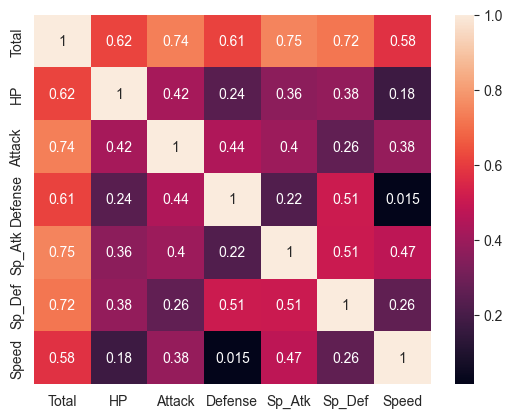

In [29]:
sns.heatmap(corr, annot=True)

Special attack, Attack and Defence are the most highly correlated to the total. Therefore, they may be useful in prediction modelling if that were the target.


C:\Users\shani\PycharmProjects\poke-project\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


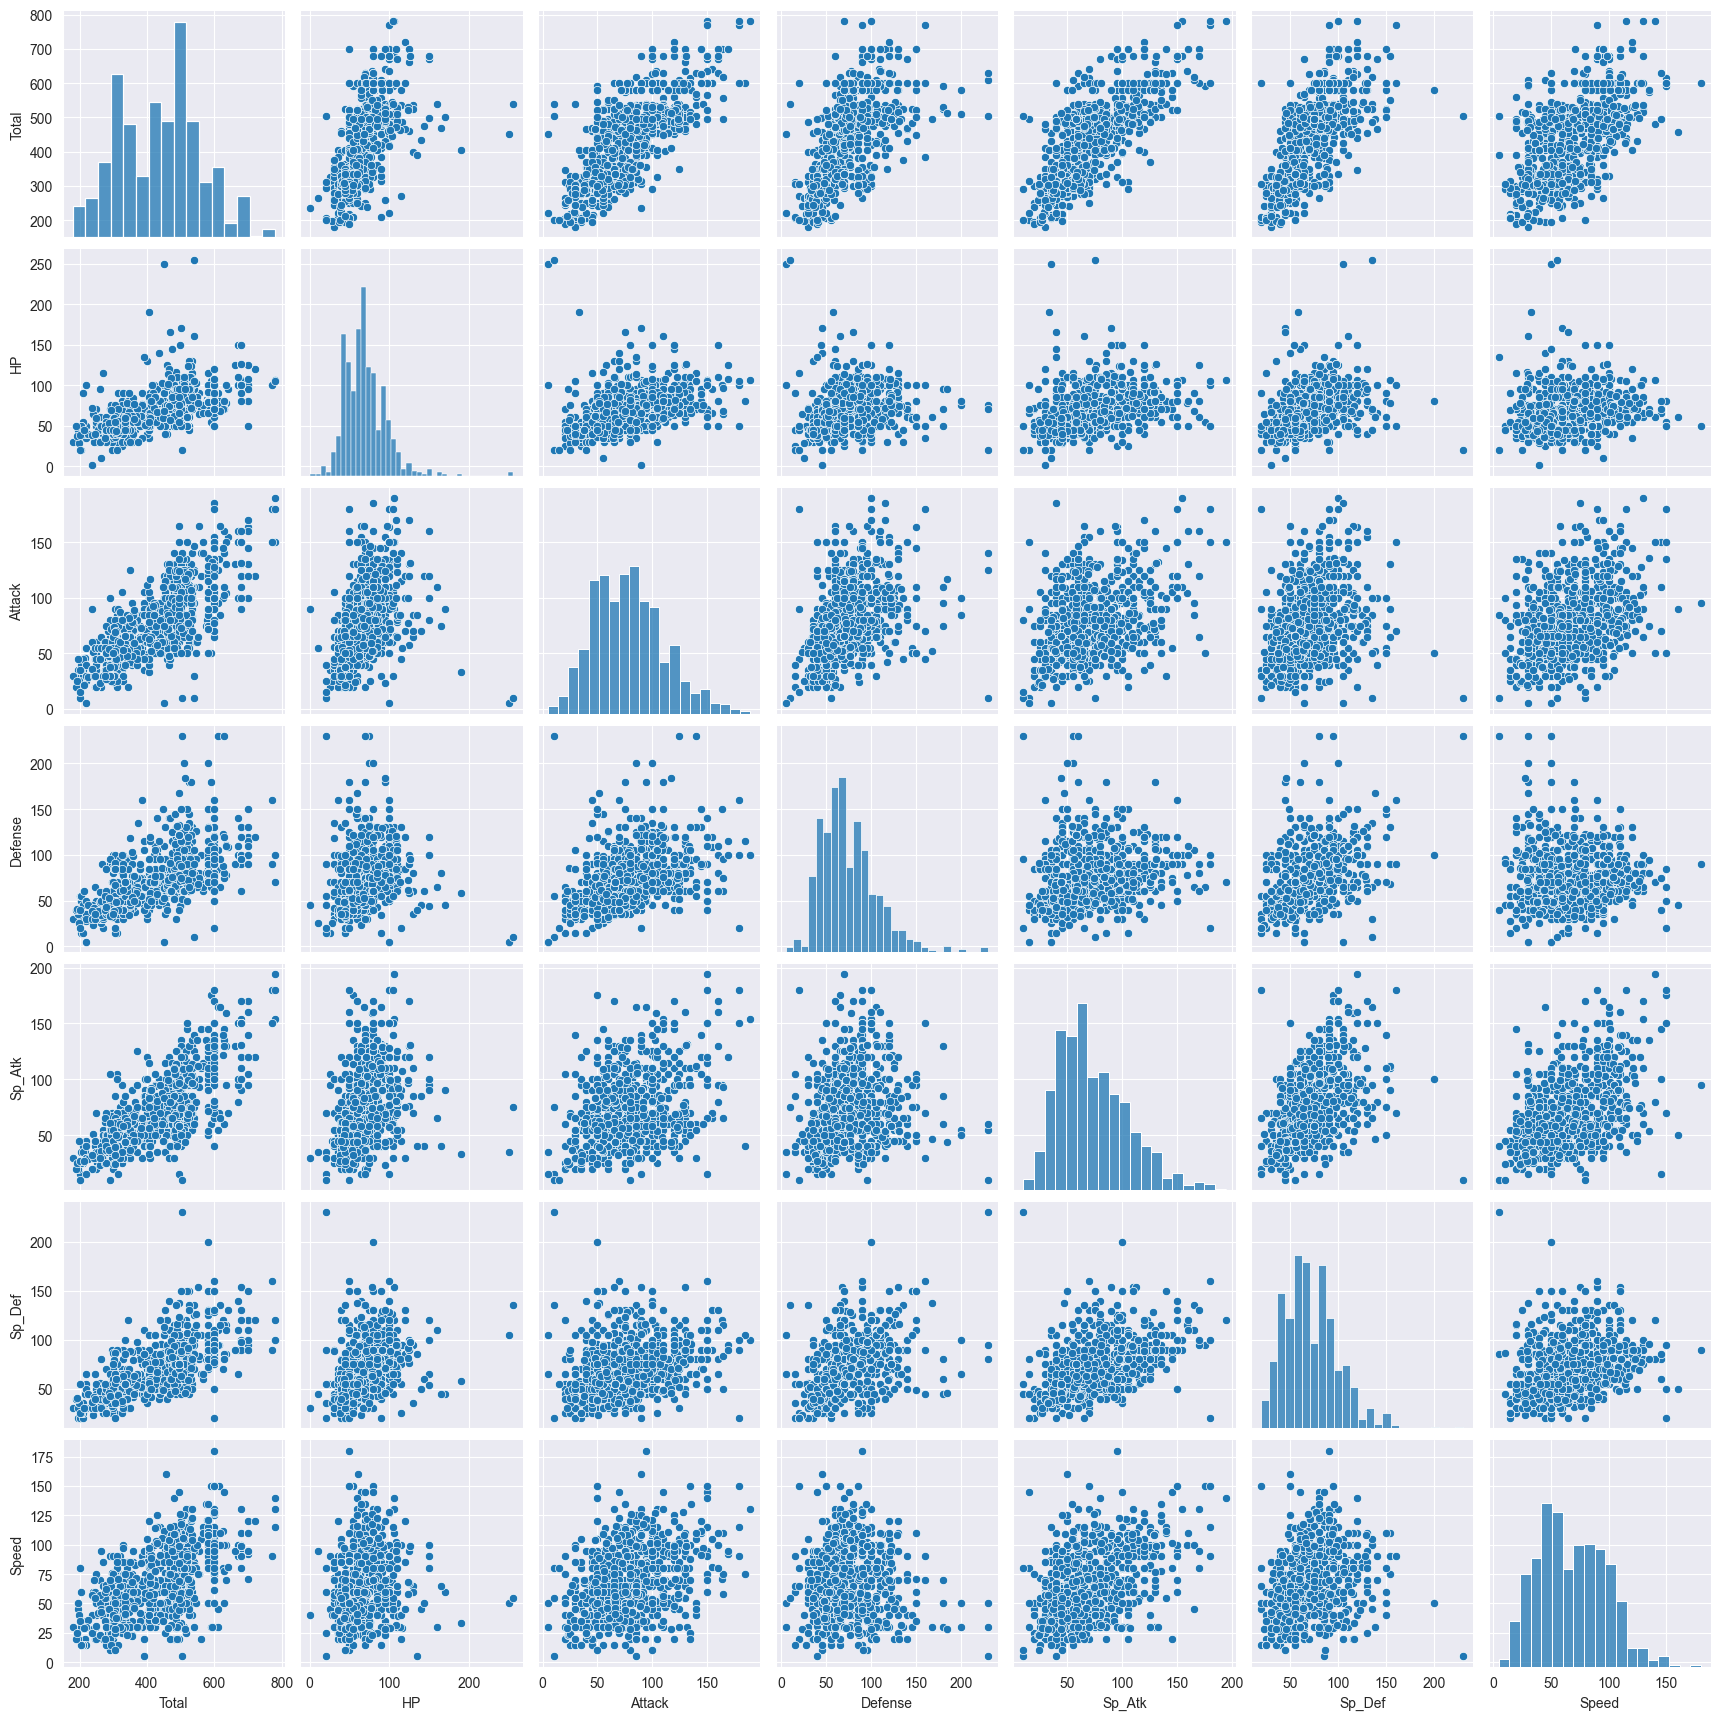

In [30]:
sns.pairplot(num_cols)

We can see some of those correlations in the scatter plots within the pait plot. We can also see that the numbers are mainly normally distributed.